# Business Problem

Masalah bisnis yang ingin diselesaikan adalah bagaimana memprediksi harga jual median properti berdasarkan karakteristik fisik bangunan dan lingkungannya. Prediksi harga penting bagi pembeli, penjual, maupun pengembang properti karena dapat memberikan estimasi nilai yang lebih akurat, mengurangi risiko salah harga, serta membantu pengambilan keputusan strategis.

# Metrik Evaluasi

Dalam mengevaluasi model, metrik yang dipilih adalah RMSE (Root Mean Squared Error) dan MAPE (Mean Absolute Percentage Error). RMSE digunakan untuk mengukur rata-rata besar kesalahan prediksi dalam satuan harga asli sehingga memberi gambaran seberapa jauh model meleset secara absolut. Sementara itu, MAPE dipakai untuk menghitung rata-rata kesalahan relatif dalam bentuk persentase terhadap harga sebenarnya, sehingga lebih mudah diinterpretasikan dalam konteks bisnis. Dengan kombinasi dua metrik ini, evaluasi model menjadi seimbang: RMSE menekankan pada akurasi numerik yang presisi, sementara MAPE membantu menilai kepraktisan model dari sudut pandang pengguna non-teknis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/winonathea/Downloads/data_daegu_apartment.csv')

In [3]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [4]:
df['YearBuilt'] = df['YearBuilt'].astype(object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   object 
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 354.4+ KB


In [6]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,10.000000,2337.000000,585840.000000


In [7]:
df.describe(include='object')

,HallwayType,TimeToSubway,SubwayStation,YearBuilt
count,4123,4123,4123,4123
unique,3,5,8,16
top,terraced,0-5min,Kyungbuk_uni_hospital,2007
freq,2528,1953,1152,853


# Data Understanding

# Data Preparation

In [8]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1422)

In [10]:
(df.duplicated().sum()/len(df))*100

np.float64(34.48944943002668)

In [11]:
df1 = df.drop_duplicates(keep="first")
df1

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [12]:
len(df)

4123

In [13]:
feat_cols = [column for column in df1.columns if column != 'SalePrice']
dup_feat = df1[df1.duplicated(subset=feat_cols, keep=False)]

n_conflict = (dup_feat.groupby(feat_cols)['SalePrice'].nunique() > 1).sum()
print("Jumlah kolom duplikat (semua fitur sama tapi SalePrice berbeda):", n_conflict)

Jumlah kolom duplikat (semua fitur sama tapi SalePrice berbeda): 107


In [14]:
mask = dup_feat.groupby(feat_cols)['SalePrice'].transform('nunique') > 1
dup_feat[mask].sort_values(by=feat_cols + ['SalePrice'])

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2271,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,111504
1381,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,131858
2674,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,141592
2607,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,168141
733,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,172566
...,...,...,...,...,...,...,...,...,...,...,...
1025,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,292035
2129,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,345132
242,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,355752
2402,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,358407


In [15]:
2689/len(df1)

0.9955572010366531

Nilai yang sama pada tiap kolom kecuali pada kolom SalePrice (kolom yang mau diprediksi) akan membuat noise. Sehingga untuk lebih mendapat prediksi yang akurat, akan diambil median SalePrice dari groupby tiap fitur.

In [16]:
feat_cols = df1.columns.drop("SalePrice")

df_grouped = (df1.groupby(list(feat_cols), as_index=False)["SalePrice"].median().rename(columns={"SalePrice": "SalePrice_median"}))
print(df_grouped.shape)

(119, 11)


In [17]:
df_grouped

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice_median
0,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,168141.0
1,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,871,115044.0
2,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,153539.5
3,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,1327,186725.0
4,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,51769.5
...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,384955.0
115,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,1035,453539.5
116,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,198685.5
117,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,914,197420.0


In [18]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       119 non-null    object 
 1   TimeToSubway                      119 non-null    object 
 2   SubwayStation                     119 non-null    object 
 3   N_FacilitiesNearBy(ETC)           119 non-null    float64
 4   N_FacilitiesNearBy(PublicOffice)  119 non-null    float64
 5   N_SchoolNearBy(University)        119 non-null    float64
 6   N_Parkinglot(Basement)            119 non-null    float64
 7   YearBuilt                         119 non-null    object 
 8   N_FacilitiesInApt                 119 non-null    int64  
 9   Size(sqf)                         119 non-null    int64  
 10  SalePrice_median                  119 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 10.4+ KB


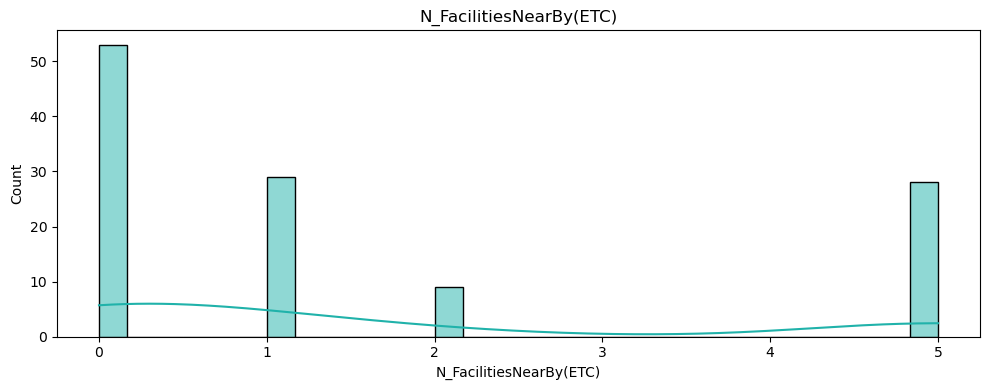

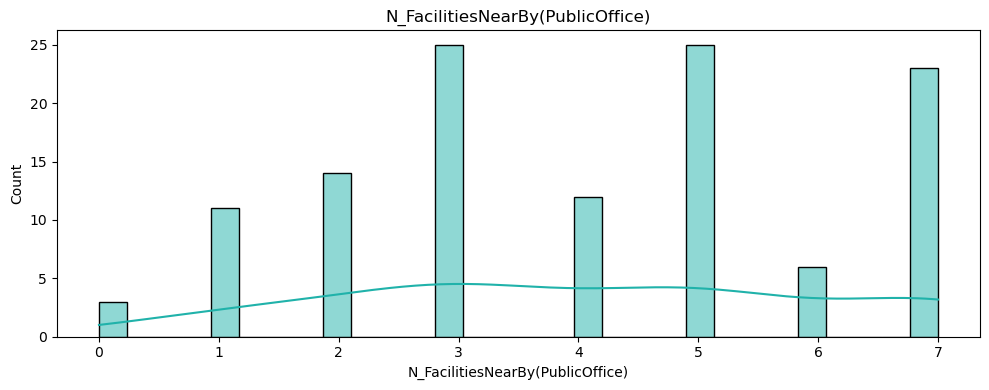

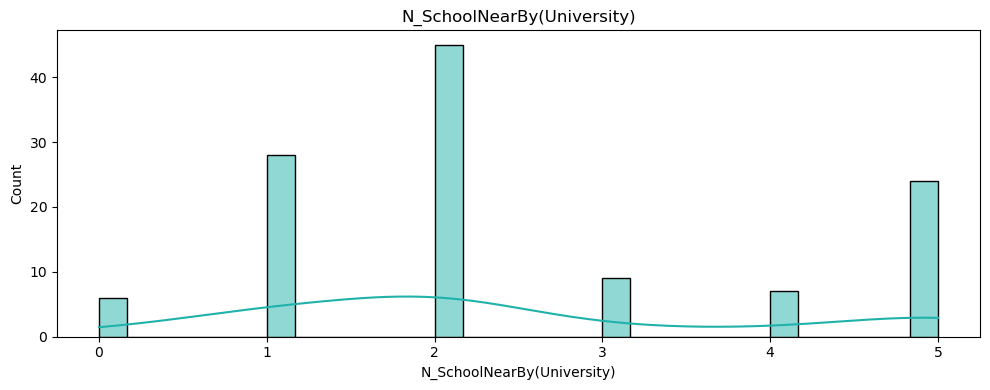

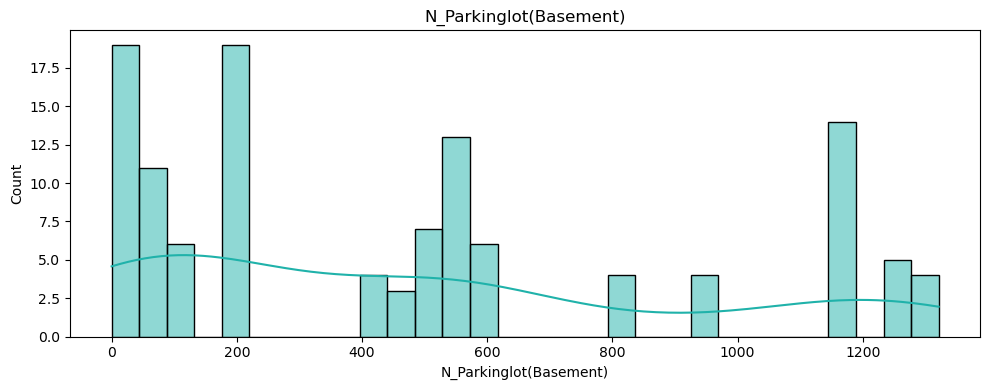

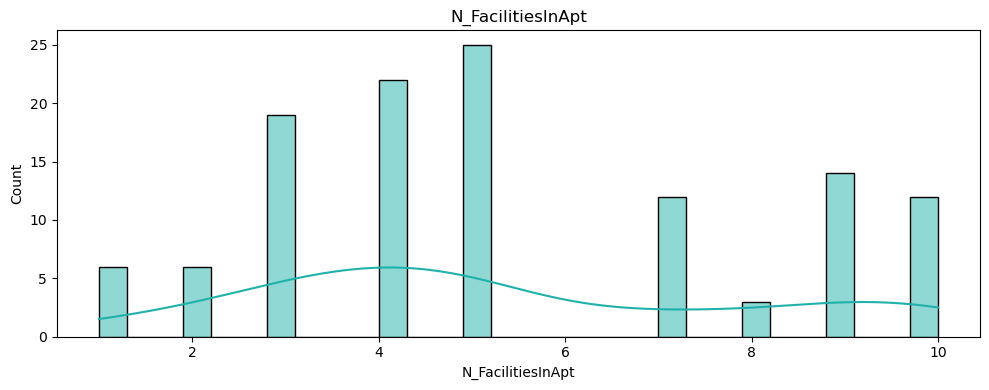

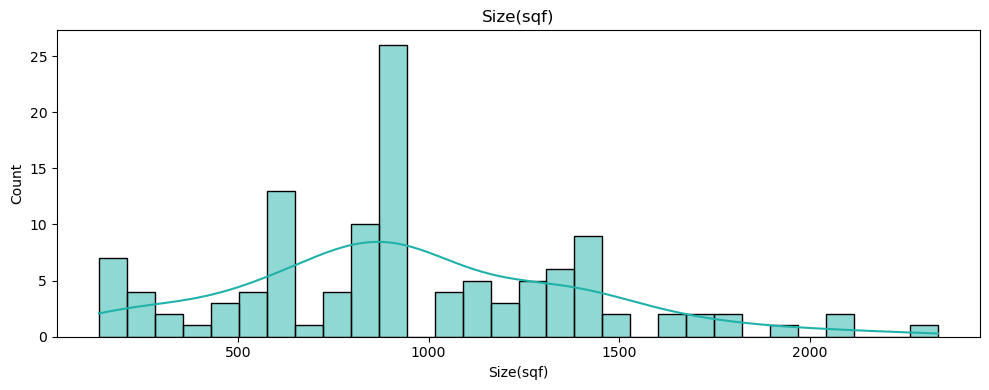

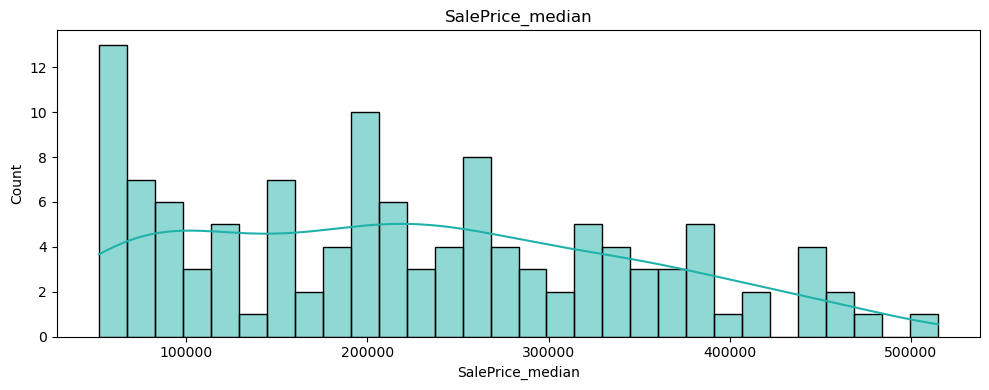

In [19]:
for column in df_grouped.describe().columns : 
    plt.figure(figsize=(10,4))
    sns.histplot(df_grouped[column], bins=30, kde=True, color = '#20B2AA')
    plt.title(f'{column}')
    plt.tight_layout()
    plt.show()

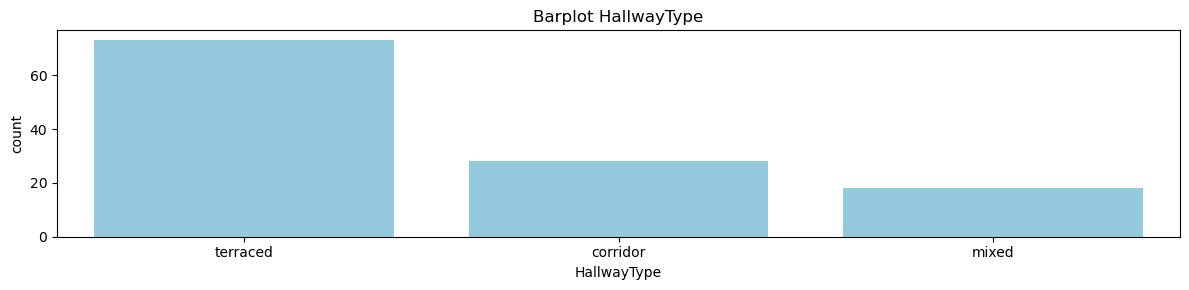

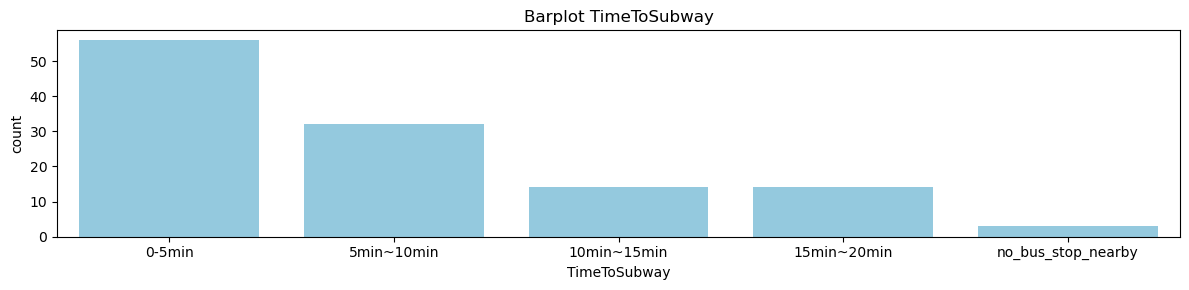

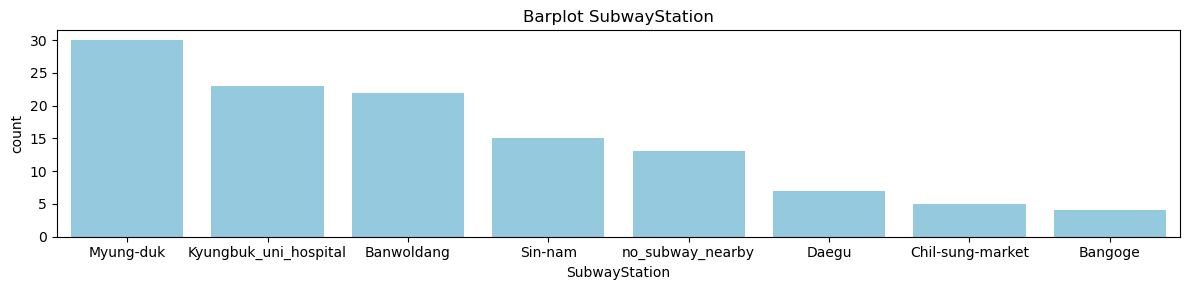

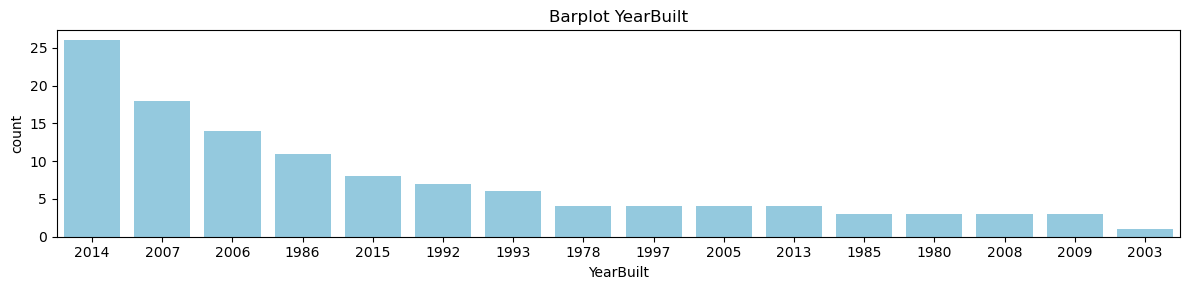

In [20]:
for col in df_grouped.describe(include = 'object'):
    plt.figure(figsize=(12,3))
    sns.countplot(data=df_grouped, x=col, order=df_grouped[col].value_counts().index, color = 'skyblue')
    plt.title(f'Barplot {col}')
    plt.xticks()
    plt.tight_layout()
    plt.show()

## Feature Engineering

### ada beberapa asumsi saat membuat feature engineering
#### 1. BuildingAge (umur bangunan) = Now - YearBuilt
karena semakin tua rumah, semakin murah biasanya
#### 2. LogSize (ukuran bangunan di log) = log(1 + Size(sqf))
hubungan antara luas rumah dan harga tidak linear murni (setiap tambahan 10 m² di rumah kecil efeknya lebih besar daripada 10 m² di rumah mewah).
#### 3. SizeAge = Size × BuildingAge
rumah besar tua mungkin nilainya tidak setinggi rumah besar baru. Interaksi ini bisa menangkap kombinasi efek luas × umur bangunan.
#### 4. TimeToSubway_Min 
Waktu ke stasiun (menit). Karena biasanya semakin dekat itu harga rumah makin tinggi.
#### 5. SalePrice Median Per Stasiun 
Untuk mengetahui per kategori stasiun subway harga rumah di sekitarnya 

In [21]:
station_median = df_grouped.groupby("SubwayStation")["SalePrice_median"].median().sort_values(ascending=False)
station_median

SubwayStation
Daegu                    283185.00
Banwoldang               272211.75
Sin-nam                  239822.50
Myung-duk                208849.00
Kyungbuk_uni_hospital    203761.00
no_subway_nearby         197420.00
Bangoge                  191371.00
Chil-sung-market          88052.50
Name: SalePrice_median, dtype: float64

In [22]:
df_grouped = df_grouped.merge(station_median.rename("StationMedianPrice"), on="SubwayStation", how="left")
df_grouped

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice
0,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,779,168141.0,203761.0
1,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,871,115044.0,203761.0
2,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,153539.5,203761.0
3,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,1327,186725.0,203761.0
4,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,51769.5,208849.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,384955.0,197420.0
115,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,1035,453539.5,197420.0
116,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,198685.5,197420.0
117,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,914,197420.0,197420.0


In [23]:
df_grouped = df_grouped.drop(columns = ['SubwayStation'])
df_grouped

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice
0,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,779,168141.0,203761.0
1,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,871,115044.0,203761.0
2,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,903,153539.5,203761.0
3,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,1327,186725.0,203761.0
4,corridor,10min~15min,5.0,7.0,5.0,0.0,1992,3,355,51769.5,208849.0
...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,5min~10min,0.0,1.0,1.0,1321.0,2015,10,914,384955.0,197420.0
115,terraced,5min~10min,0.0,1.0,1.0,1321.0,2015,10,1035,453539.5,197420.0
116,terraced,no_bus_stop_nearby,2.0,2.0,1.0,203.0,2009,5,910,198685.5,197420.0
117,terraced,no_bus_stop_nearby,2.0,2.0,1.0,203.0,2009,5,914,197420.0,197420.0


In [24]:
time_map = {
    "0-5min": 3,
    "5min~10min": 8,
    "10min~15min": 13,
    "15min~20min": 18,
    "no_bus_stop_nearby": 60  # asumsi jauh sekali
}

df_grouped["TimeToSubway_Min"] = df_grouped["TimeToSubway"].map(time_map)

In [25]:
df_grouped

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice,TimeToSubway_Min
0,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,779,168141.0,203761.0,3
1,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,871,115044.0,203761.0,3
2,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,903,153539.5,203761.0,3
3,corridor,0-5min,0.0,3.0,2.0,0.0,1978,3,1327,186725.0,203761.0,3
4,corridor,10min~15min,5.0,7.0,5.0,0.0,1992,3,355,51769.5,208849.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,5min~10min,0.0,1.0,1.0,1321.0,2015,10,914,384955.0,197420.0,8
115,terraced,5min~10min,0.0,1.0,1.0,1321.0,2015,10,1035,453539.5,197420.0,8
116,terraced,no_bus_stop_nearby,2.0,2.0,1.0,203.0,2009,5,910,198685.5,197420.0,60
117,terraced,no_bus_stop_nearby,2.0,2.0,1.0,203.0,2009,5,914,197420.0,197420.0,60


In [26]:
df_grouped = df_grouped.drop(columns = ['TimeToSubway'])
df_grouped

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice,TimeToSubway_Min
0,corridor,0.0,3.0,2.0,0.0,1978,3,779,168141.0,203761.0,3
1,corridor,0.0,3.0,2.0,0.0,1978,3,871,115044.0,203761.0,3
2,corridor,0.0,3.0,2.0,0.0,1978,3,903,153539.5,203761.0,3
3,corridor,0.0,3.0,2.0,0.0,1978,3,1327,186725.0,203761.0,3
4,corridor,5.0,7.0,5.0,0.0,1992,3,355,51769.5,208849.0,13
...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,0.0,1.0,1.0,1321.0,2015,10,914,384955.0,197420.0,8
115,terraced,0.0,1.0,1.0,1321.0,2015,10,1035,453539.5,197420.0,8
116,terraced,2.0,2.0,1.0,203.0,2009,5,910,198685.5,197420.0,60
117,terraced,2.0,2.0,1.0,203.0,2009,5,914,197420.0,197420.0,60


In [27]:
CURRENT_YEAR = 2025
df_grouped["BuildingAge"] = CURRENT_YEAR - df_grouped["YearBuilt"].astype(int)
df_grouped

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge
0,corridor,0.0,3.0,2.0,0.0,1978,3,779,168141.0,203761.0,3,47
1,corridor,0.0,3.0,2.0,0.0,1978,3,871,115044.0,203761.0,3,47
2,corridor,0.0,3.0,2.0,0.0,1978,3,903,153539.5,203761.0,3,47
3,corridor,0.0,3.0,2.0,0.0,1978,3,1327,186725.0,203761.0,3,47
4,corridor,5.0,7.0,5.0,0.0,1992,3,355,51769.5,208849.0,13,33
...,...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,0.0,1.0,1.0,1321.0,2015,10,914,384955.0,197420.0,8,10
115,terraced,0.0,1.0,1.0,1321.0,2015,10,1035,453539.5,197420.0,8,10
116,terraced,2.0,2.0,1.0,203.0,2009,5,910,198685.5,197420.0,60,16
117,terraced,2.0,2.0,1.0,203.0,2009,5,914,197420.0,197420.0,60,16


In [28]:
df_grouped = df_grouped.drop(columns = ['YearBuilt'])
df_grouped

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge
0,corridor,0.0,3.0,2.0,0.0,3,779,168141.0,203761.0,3,47
1,corridor,0.0,3.0,2.0,0.0,3,871,115044.0,203761.0,3,47
2,corridor,0.0,3.0,2.0,0.0,3,903,153539.5,203761.0,3,47
3,corridor,0.0,3.0,2.0,0.0,3,1327,186725.0,203761.0,3,47
4,corridor,5.0,7.0,5.0,0.0,3,355,51769.5,208849.0,13,33
...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,0.0,1.0,1.0,1321.0,10,914,384955.0,197420.0,8,10
115,terraced,0.0,1.0,1.0,1321.0,10,1035,453539.5,197420.0,8,10
116,terraced,2.0,2.0,1.0,203.0,5,910,198685.5,197420.0,60,16
117,terraced,2.0,2.0,1.0,203.0,5,914,197420.0,197420.0,60,16


In [29]:
df_grouped["LogSize"] = np.log1p(df_grouped["Size(sqf)"])
df_grouped

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge,LogSize
0,corridor,0.0,3.0,2.0,0.0,3,779,168141.0,203761.0,3,47,6.659294
1,corridor,0.0,3.0,2.0,0.0,3,871,115044.0,203761.0,3,47,6.770789
2,corridor,0.0,3.0,2.0,0.0,3,903,153539.5,203761.0,3,47,6.806829
3,corridor,0.0,3.0,2.0,0.0,3,1327,186725.0,203761.0,3,47,7.191429
4,corridor,5.0,7.0,5.0,0.0,3,355,51769.5,208849.0,13,33,5.874931
...,...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,0.0,1.0,1.0,1321.0,10,914,384955.0,197420.0,8,10,6.818924
115,terraced,0.0,1.0,1.0,1321.0,10,1035,453539.5,197420.0,8,10,6.943122
116,terraced,2.0,2.0,1.0,203.0,5,910,198685.5,197420.0,60,16,6.814543
117,terraced,2.0,2.0,1.0,203.0,5,914,197420.0,197420.0,60,16,6.818924


In [30]:
df_grouped["SizexAge"] = df_grouped["LogSize"] * df_grouped["BuildingAge"]
df_grouped

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge,LogSize,SizexAge
0,corridor,0.0,3.0,2.0,0.0,3,779,168141.0,203761.0,3,47,6.659294,312.986814
1,corridor,0.0,3.0,2.0,0.0,3,871,115044.0,203761.0,3,47,6.770789,318.227103
2,corridor,0.0,3.0,2.0,0.0,3,903,153539.5,203761.0,3,47,6.806829,319.920980
3,corridor,0.0,3.0,2.0,0.0,3,1327,186725.0,203761.0,3,47,7.191429,337.997179
4,corridor,5.0,7.0,5.0,0.0,3,355,51769.5,208849.0,13,33,5.874931,193.872714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,0.0,1.0,1.0,1321.0,10,914,384955.0,197420.0,8,10,6.818924,68.189241
115,terraced,0.0,1.0,1.0,1321.0,10,1035,453539.5,197420.0,8,10,6.943122,69.431224
116,terraced,2.0,2.0,1.0,203.0,5,910,198685.5,197420.0,60,16,6.814543,109.032686
117,terraced,2.0,2.0,1.0,203.0,5,914,197420.0,197420.0,60,16,6.818924,109.102785


In [31]:
df_grouped = df_grouped.drop(columns = ['Size(sqf)'])
df_grouped

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge,LogSize,SizexAge
0,corridor,0.0,3.0,2.0,0.0,3,168141.0,203761.0,3,47,6.659294,312.986814
1,corridor,0.0,3.0,2.0,0.0,3,115044.0,203761.0,3,47,6.770789,318.227103
2,corridor,0.0,3.0,2.0,0.0,3,153539.5,203761.0,3,47,6.806829,319.920980
3,corridor,0.0,3.0,2.0,0.0,3,186725.0,203761.0,3,47,7.191429,337.997179
4,corridor,5.0,7.0,5.0,0.0,3,51769.5,208849.0,13,33,5.874931,193.872714
...,...,...,...,...,...,...,...,...,...,...,...,...
114,terraced,0.0,1.0,1.0,1321.0,10,384955.0,197420.0,8,10,6.818924,68.189241
115,terraced,0.0,1.0,1.0,1321.0,10,453539.5,197420.0,8,10,6.943122,69.431224
116,terraced,2.0,2.0,1.0,203.0,5,198685.5,197420.0,60,16,6.814543,109.032686
117,terraced,2.0,2.0,1.0,203.0,5,197420.0,197420.0,60,16,6.818924,109.102785


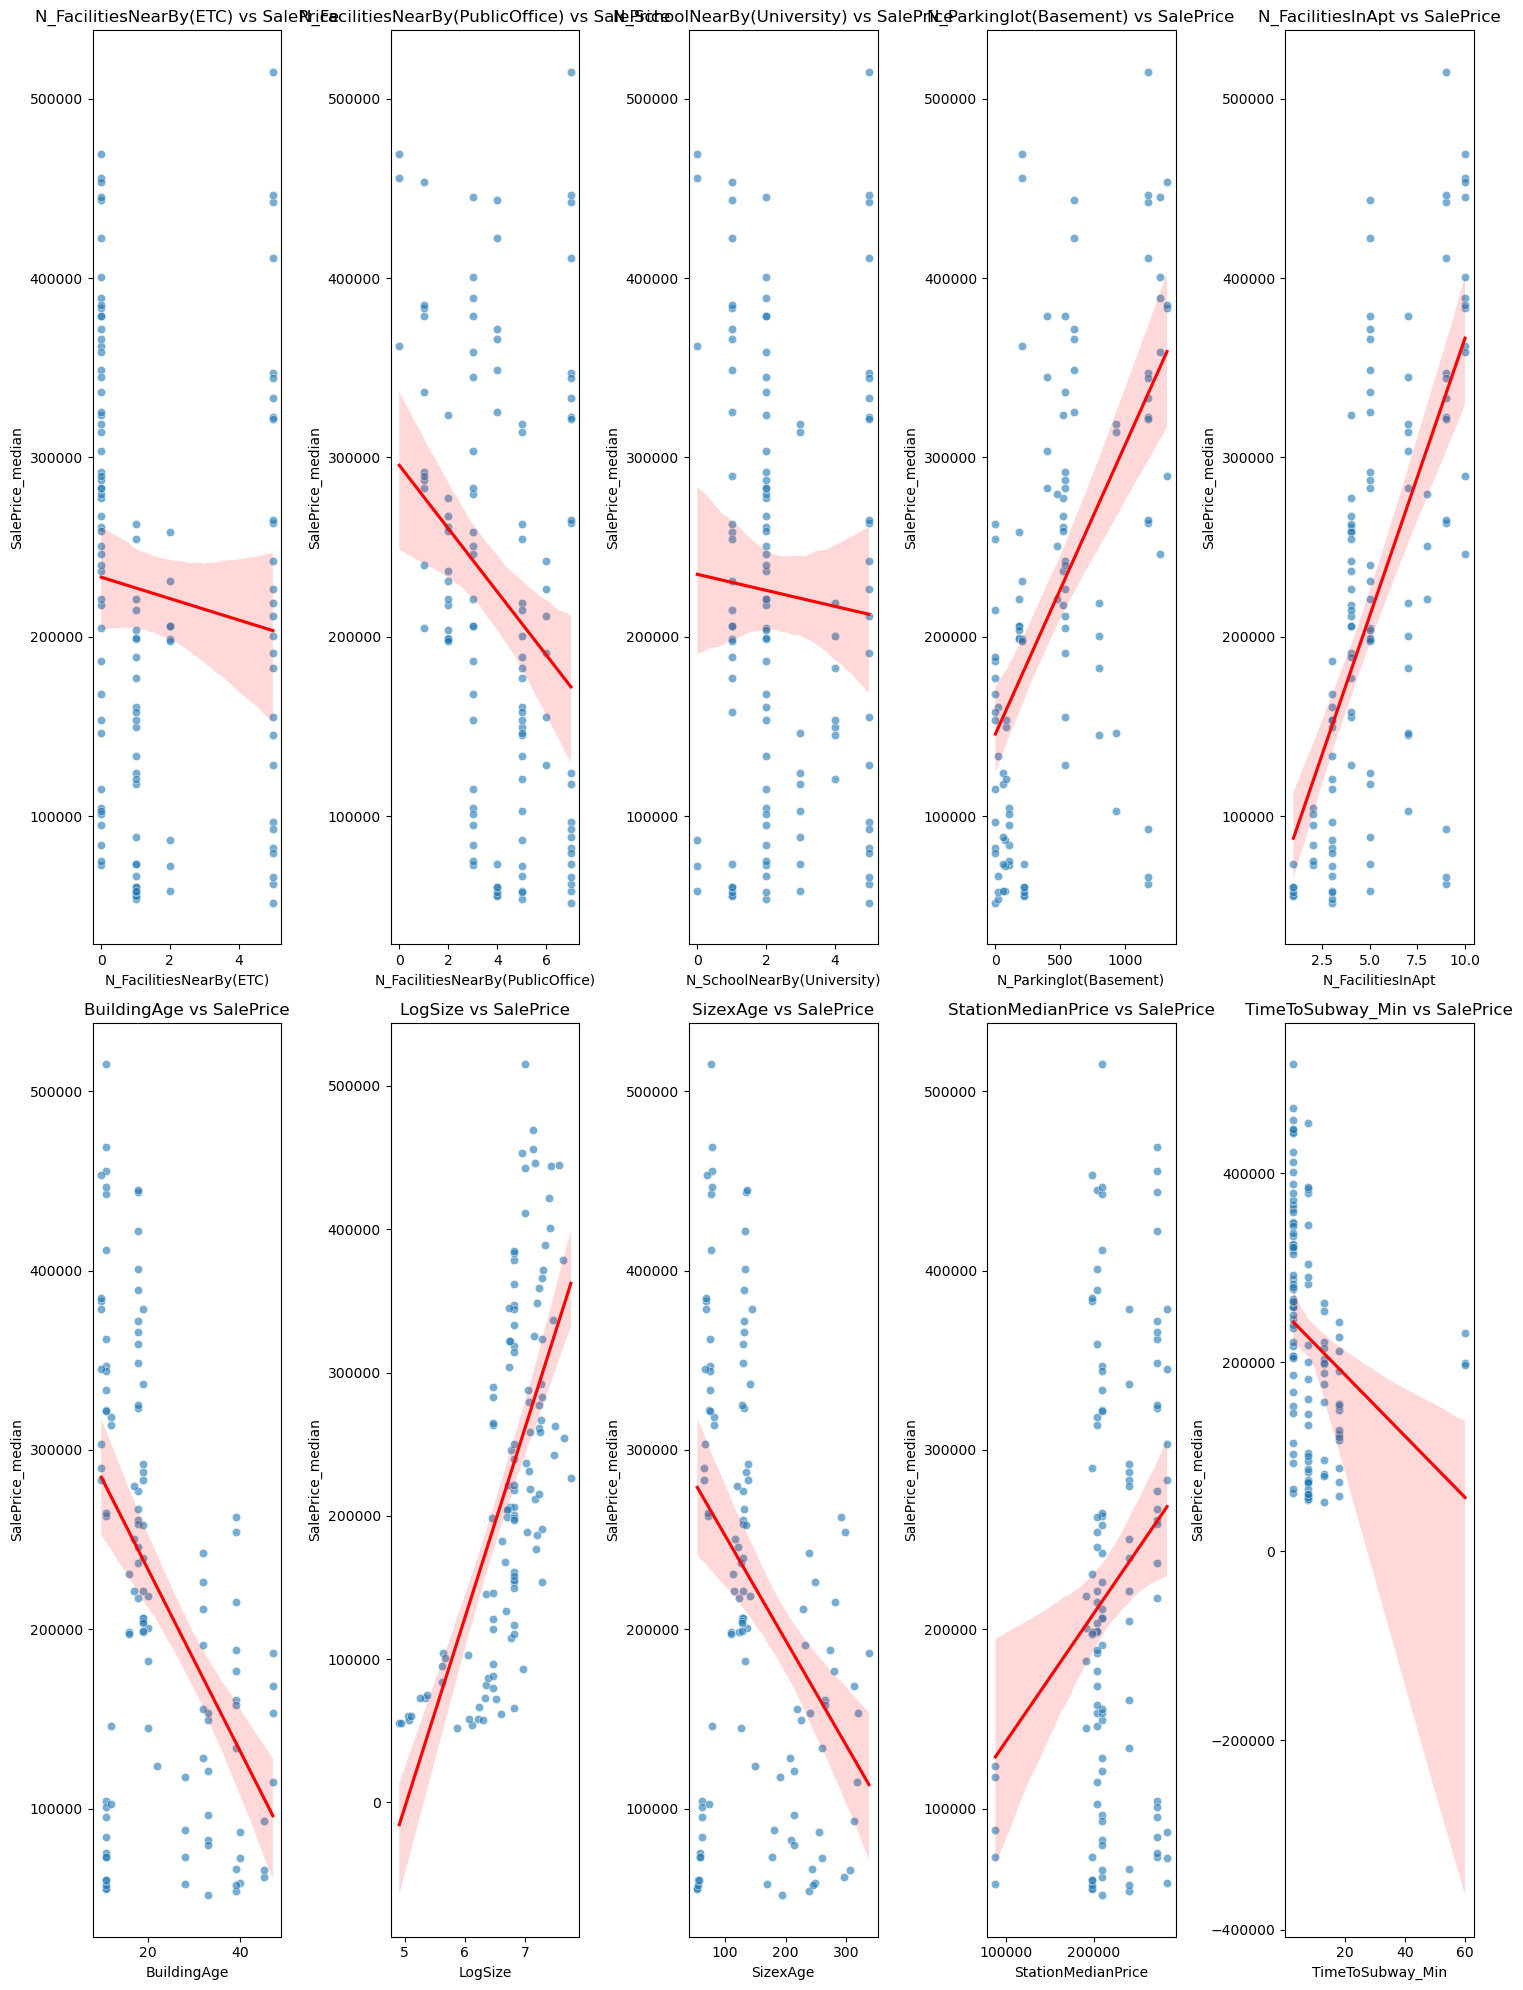

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    "N_FacilitiesNearBy(ETC)",
    "N_FacilitiesNearBy(PublicOffice)",
    "N_SchoolNearBy(University)",
    "N_Parkinglot(Basement)",
    "N_FacilitiesInApt",
    "BuildingAge",
    "LogSize",
    "SizexAge",
    "StationMedianPrice",
    "TimeToSubway_Min"
]

plt.figure(figsize=(15, 20))

for i, col in enumerate(features, 1):
    plt.subplot(2, 5, i)
    sns.scatterplot(x=df_grouped[col], y=df_grouped["SalePrice_median"], alpha=0.6)
    sns.regplot(x=df_grouped[col], y=df_grouped["SalePrice_median"], scatter=False, color="red")
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.show()


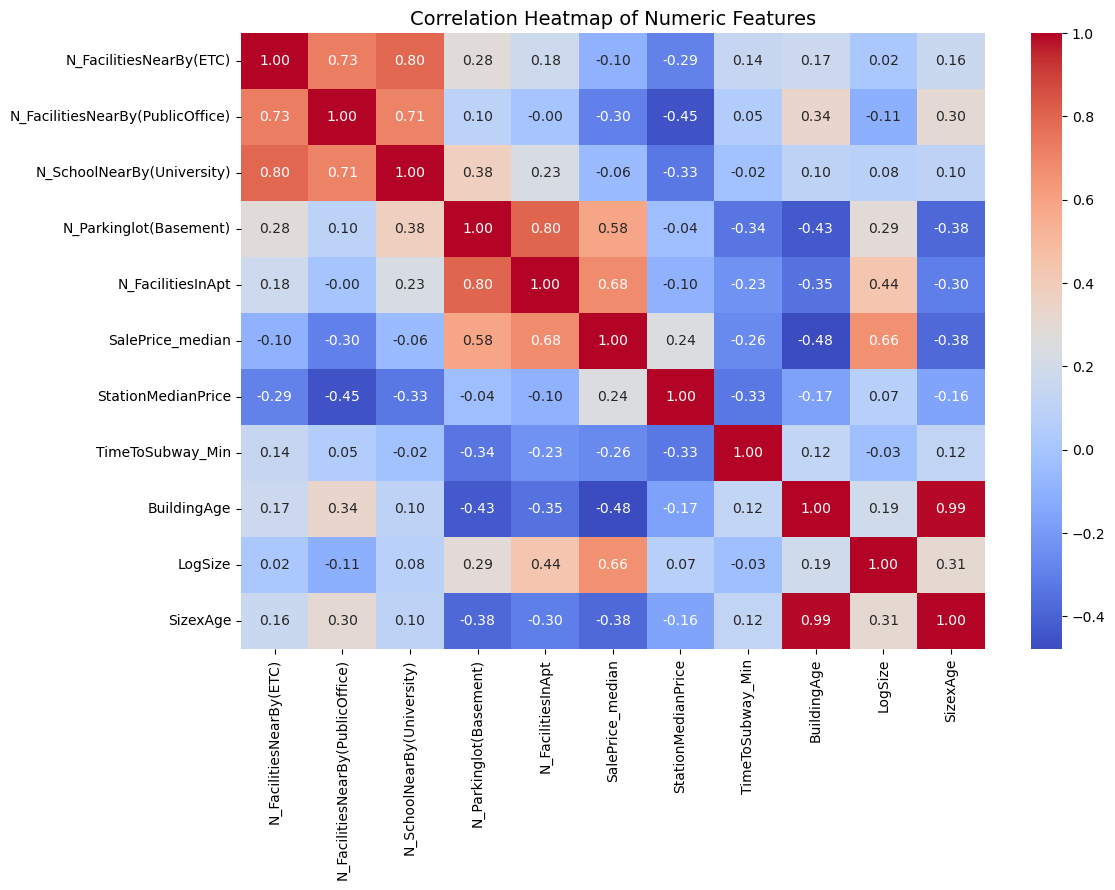

In [33]:
num_cols = df_grouped.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12, 8))
corr = df_grouped[num_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

## untuk mencegah multikolinearitas, akan dilakukan feature engineering lagi
1. korelasi antar fasilitas kuat, artinya, kalau ada banyak fasilitas di satu kategori, biasanya kategori lain juga banyak. Bisa redundant.
jadi akan dibuat kolom baru berupa penjumlahan 3 kolom tersebut: "N_FacilitiesNearBy(ETC)", "N_FacilitiesNearBy(PublicOffice)", "N_SchoolNearBy(University)"
2. Basement parking ↔ Facilities in Apt = 0.83
Korelasi Sangat tinggi. Jadi apartemen dengan banyak fasilitas biasanya juga punya parkir besar. Jadi akan dihapus salah satu saja, yaitu kolom Basement Parking.

In [34]:
df_grouped["AmenitiesIndex"] = (
    df_grouped["N_FacilitiesNearBy(ETC)"] +
    df_grouped["N_FacilitiesNearBy(PublicOffice)"] +
    df_grouped["N_SchoolNearBy(University)"]
)
df_grouped = df_grouped.drop(columns = ['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)'])
df_grouped

,HallwayType,N_Parkinglot(Basement),N_FacilitiesInApt,SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge,LogSize,SizexAge,AmenitiesIndex
0,corridor,0.0,3,168141.0,203761.0,3,47,6.659294,312.986814,5.0
1,corridor,0.0,3,115044.0,203761.0,3,47,6.770789,318.227103,5.0
2,corridor,0.0,3,153539.5,203761.0,3,47,6.806829,319.920980,5.0
3,corridor,0.0,3,186725.0,203761.0,3,47,7.191429,337.997179,5.0
4,corridor,0.0,3,51769.5,208849.0,13,33,5.874931,193.872714,17.0
...,...,...,...,...,...,...,...,...,...,...
114,terraced,1321.0,10,384955.0,197420.0,8,10,6.818924,68.189241,2.0
115,terraced,1321.0,10,453539.5,197420.0,8,10,6.943122,69.431224,2.0
116,terraced,203.0,5,198685.5,197420.0,60,16,6.814543,109.032686,5.0
117,terraced,203.0,5,197420.0,197420.0,60,16,6.818924,109.102785,5.0


In [35]:
df_grouped = df_grouped.drop(columns = ['N_Parkinglot(Basement)'])
df_grouped

,HallwayType,N_FacilitiesInApt,SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge,LogSize,SizexAge,AmenitiesIndex
0,corridor,3,168141.0,203761.0,3,47,6.659294,312.986814,5.0
1,corridor,3,115044.0,203761.0,3,47,6.770789,318.227103,5.0
2,corridor,3,153539.5,203761.0,3,47,6.806829,319.920980,5.0
3,corridor,3,186725.0,203761.0,3,47,7.191429,337.997179,5.0
4,corridor,3,51769.5,208849.0,13,33,5.874931,193.872714,17.0
...,...,...,...,...,...,...,...,...,...
114,terraced,10,384955.0,197420.0,8,10,6.818924,68.189241,2.0
115,terraced,10,453539.5,197420.0,8,10,6.943122,69.431224,2.0
116,terraced,5,198685.5,197420.0,60,16,6.814543,109.032686,5.0
117,terraced,5,197420.0,197420.0,60,16,6.818924,109.102785,5.0


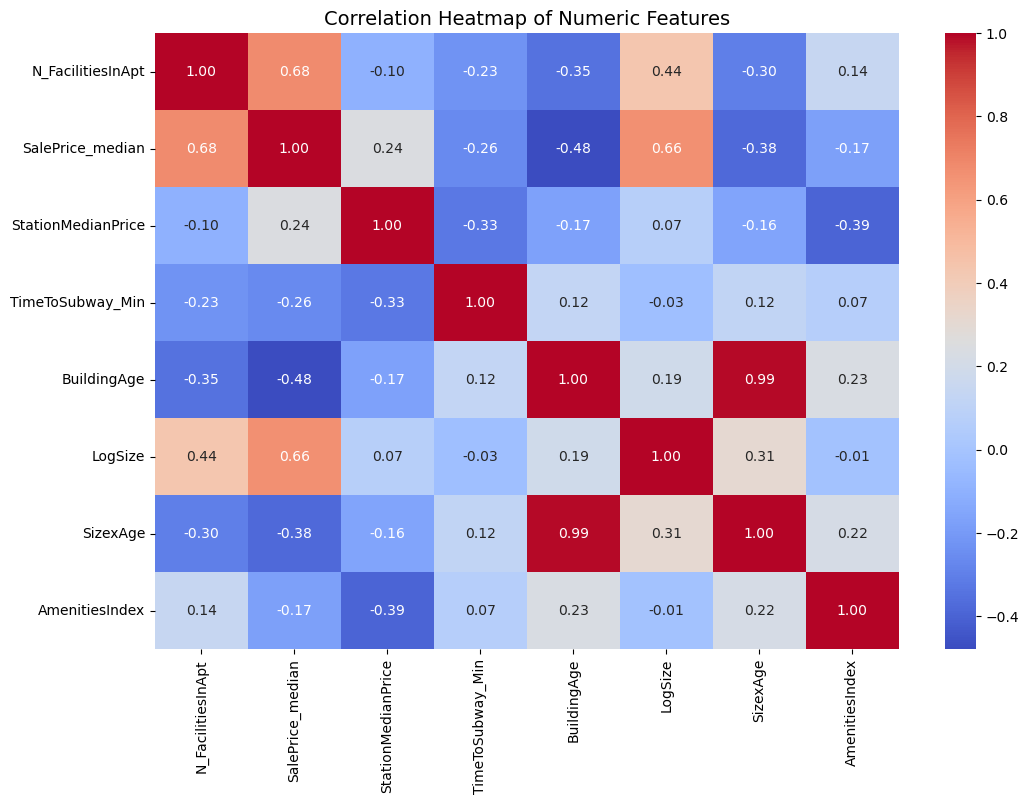

In [36]:
num_cols = df_grouped.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12, 8))
corr = df_grouped[num_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

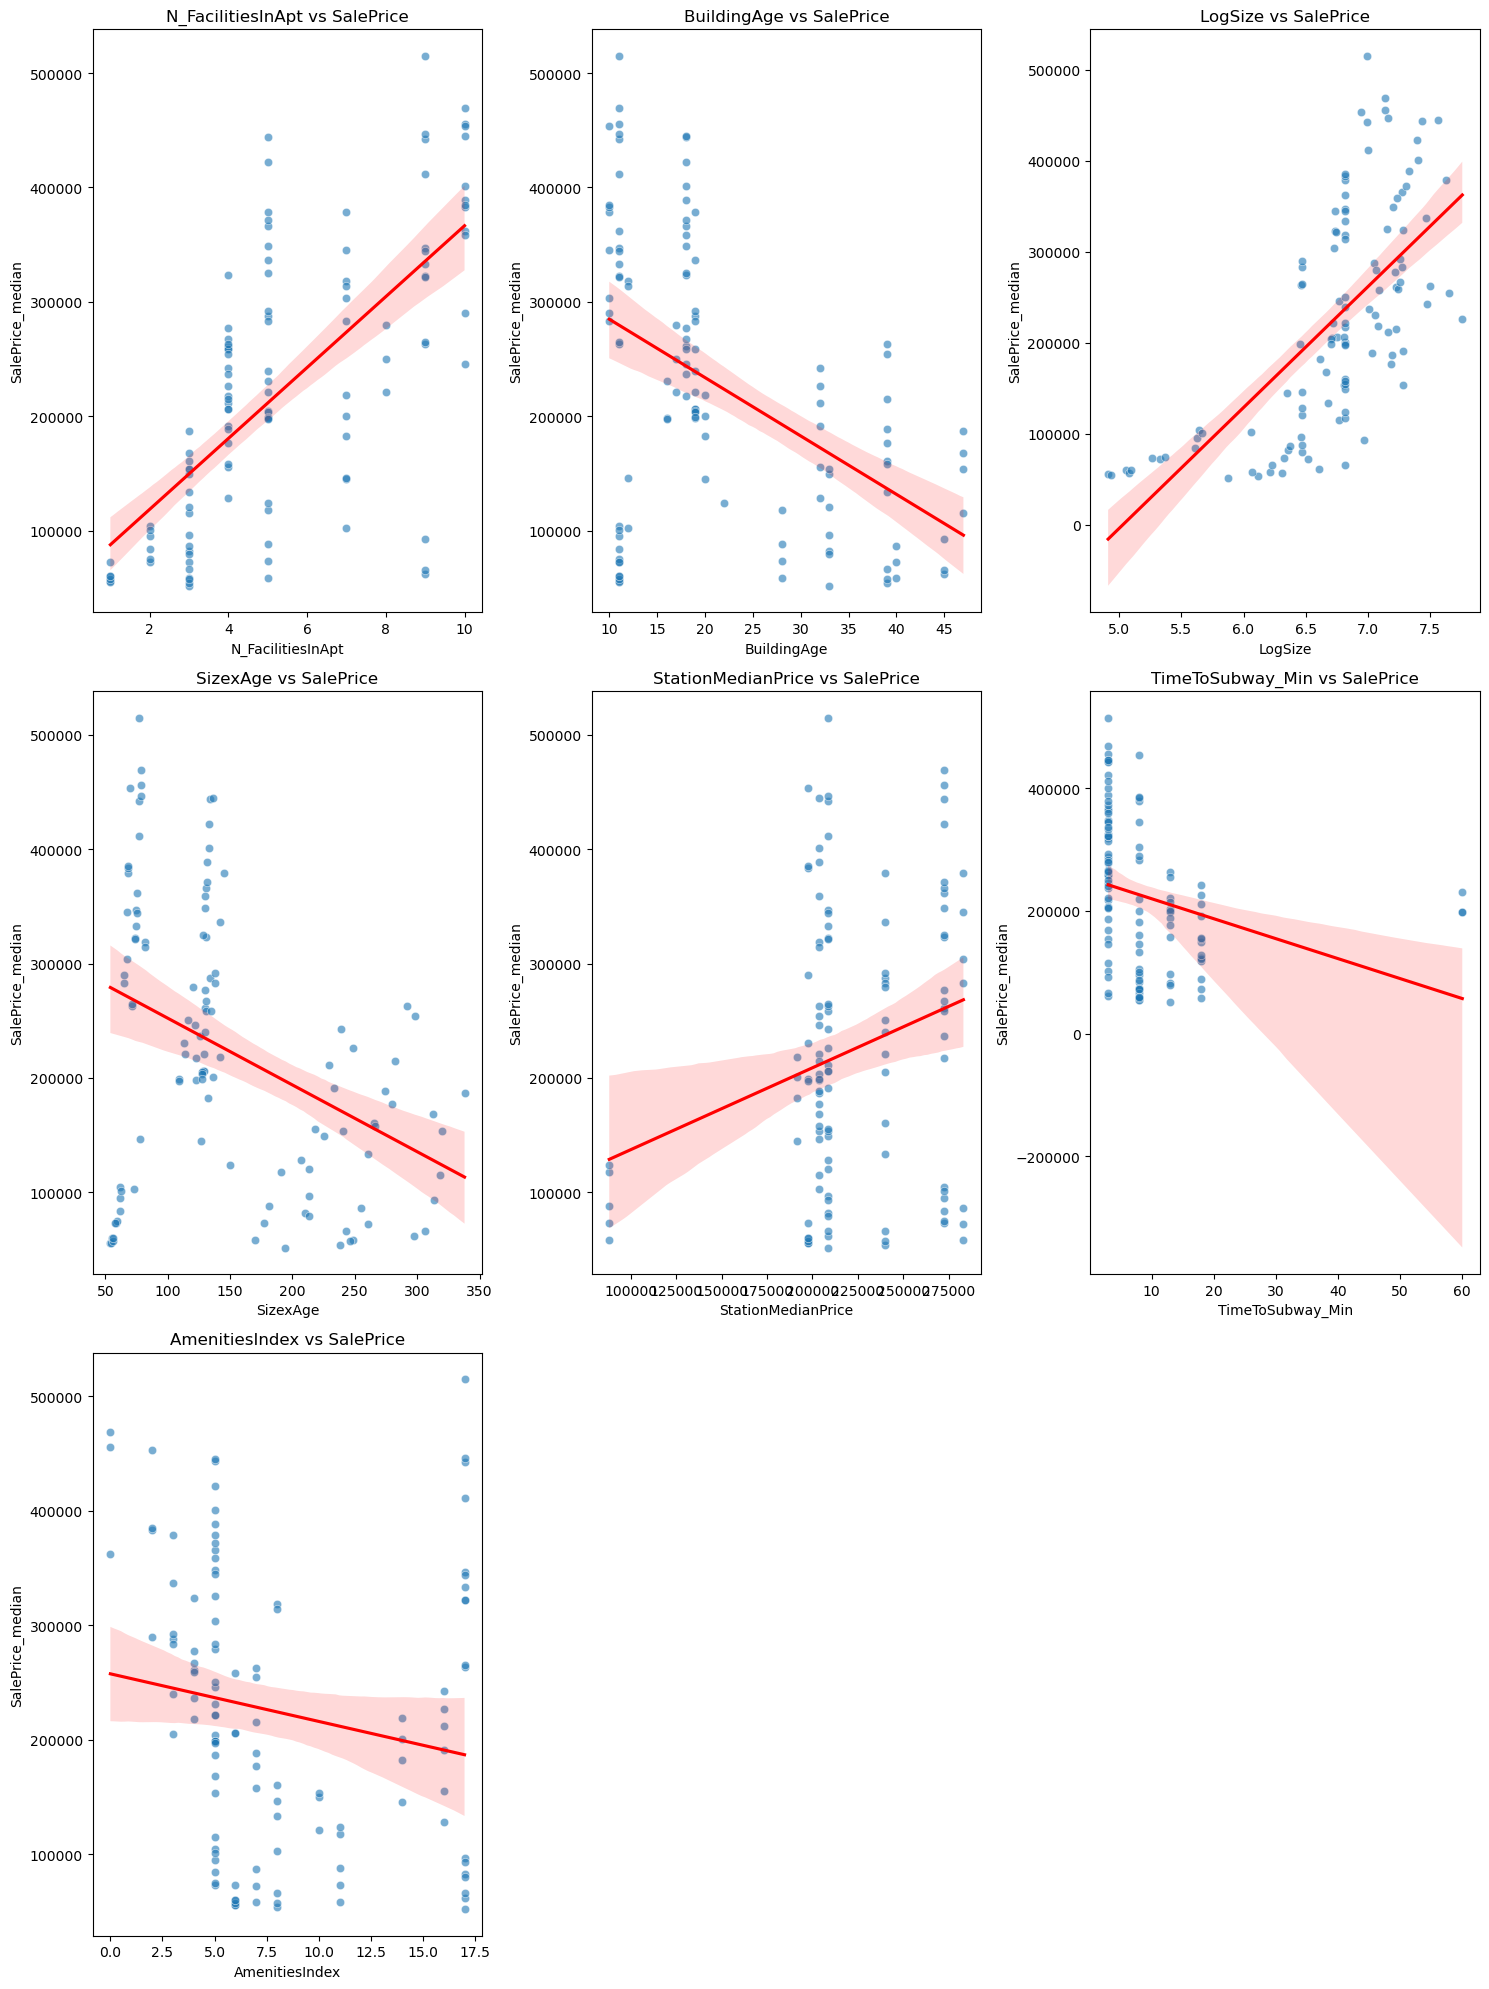

In [37]:


features = [
    "N_FacilitiesInApt",
    "BuildingAge",
    "LogSize",
    "SizexAge",
    "StationMedianPrice",
    "TimeToSubway_Min",
    "AmenitiesIndex"
]

plt.figure(figsize=(15, 20))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_grouped[col], y=df_grouped["SalePrice_median"], alpha=0.6)
    sns.regplot(x=df_grouped[col], y=df_grouped["SalePrice_median"], scatter=False, color="red")
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.show()


In [39]:
df_grouped = df_grouped.drop(columns = ['SizexAge'])
df_grouped

,HallwayType,N_FacilitiesInApt,SalePrice_median,StationMedianPrice,TimeToSubway_Min,BuildingAge,LogSize,AmenitiesIndex
0,corridor,3,168141.0,203761.0,3,47,6.659294,5.0
1,corridor,3,115044.0,203761.0,3,47,6.770789,5.0
2,corridor,3,153539.5,203761.0,3,47,6.806829,5.0
3,corridor,3,186725.0,203761.0,3,47,7.191429,5.0
4,corridor,3,51769.5,208849.0,13,33,5.874931,17.0
...,...,...,...,...,...,...,...,...
114,terraced,10,384955.0,197420.0,8,10,6.818924,2.0
115,terraced,10,453539.5,197420.0,8,10,6.943122,2.0
116,terraced,5,198685.5,197420.0,60,16,6.814543,5.0
117,terraced,5,197420.0,197420.0,60,16,6.818924,5.0


## Modelling

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.compose import ColumnTransformer


In [40]:
num_cols = [
    "N_FacilitiesInApt","StationMedianPrice","TimeToSubway_Min","BuildingAge",
    "LogSize","AmenitiesIndex"
]
cat_cols = ["HallwayType"]

In [43]:
num_pipe = Pipeline([
    ("median", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

In [44]:
cat_pipe = Pipeline([
    ("mode", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

In [45]:
ct = ColumnTransformer([
    ("num", num_pipe, num_cols ),
    ("cat", cat_pipe, cat_cols)
], remainder="drop")

In [47]:
from sklearn.model_selection import train_test_split,cross_validate, RandomizedSearchCV


In [48]:
X = df_grouped.drop(columns=[ "SalePrice_median"])
y = df_grouped["SalePrice_median"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso



In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
tree_bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)
lgbm_reg = LGBMRegressor(random_state=42, verbose=-1)
svm_reg = SVR() 
knn_reg = KNeighborsRegressor(weights="distance")
ridge_reg = Ridge(random_state=42)
lasso_reg = Lasso(random_state=42)

In [53]:
models = {
    'treebag': tree_bagging_reg,
    'rf': random_forest_reg,
    'xgb': xgb_reg,
    'lgbm': lgbm_reg,
    'svm': svm_reg,
    'knn' : knn_reg,
    'ridge': ridge_reg,
    'lasso': lasso_reg
}

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

results = []
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', ct),
        ('model', model)
    ])
    
    # RMSE
    rmse = cross_val_score(pipe, X_train, y_train, cv=5,
                           scoring="neg_root_mean_squared_error")
    # MAPE
    mape = cross_val_score(pipe, X_train, y_train, cv=5,
                          scoring=mape_scorer)
    
    results.append({
        "Model": name,
        "RMSE": -rmse.mean(),   
        "MAPE": -mape.mean()*100
    })


In [59]:
df_result = pd.DataFrame(results).sort_values("RMSE", ascending = True)
df_result

,Model,RMSE,MAPE
0,treebag,31939.708553,15.497771
1,rf,33487.400660,16.419905
2,xgb,36735.772393,15.111624
5,knn,38661.899778,17.617635
6,ridge,45419.892714,22.703856
7,lasso,45511.262166,23.322794
3,lgbm,53841.013354,27.893598
4,svm,127145.511260,73.356283


Hasil evaluasi menunjukkan bahwa model berbasis pohon seperti bagging, random forest, dan XGBoost memberikan performa terbaik. Hal ini mengindikasikan bahwa hubungan antara fitur dengan harga bersifat non-linear dan penuh interaksi, sehingga model pohon lebih mampu menangkap pola kompleks dibandingkan pendekatan linear sederhana. Akan dilanjutkan dengan 3 model tersebut untuk dicek dengan data test.

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [62]:
results = []
best_models = {
    "Bagging": tree_bagging_reg,
    "RandomForest": random_forest_reg,
    "XGB": xgb_reg
}
for name, model in best_models.items():
    pipe = Pipeline([
        ('preprocess', ct),
        ('model', model)
    ])
    
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAPE (%)": mape
    })  
    

In [63]:
df_result = pd.DataFrame(results).sort_values("RMSE", ascending = True)
df_result

,Model,RMSE,MAPE (%)
1,RandomForest,31047.911236,13.906938
2,XGB,33277.051894,13.194716
0,Bagging,34171.889214,14.350502


## Hyperparameter Tuning

#### random forest

In [65]:
rf_tuned = Pipeline([
        ('preprocess', ct),
        ('model', random_forest_reg)
    ])

In [66]:
from sklearn.model_selection import RandomizedSearchCV

param_rf = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=param_rf,
    n_iter=20, cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42, n_jobs=-1
)

rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['N_FacilitiesInApt',
                                                                                'StationMedianPrice',
                                                                                'TimeToSubway_Min',
                                                                                'BuildingAge',
                                                                                'LogSize',
                                                                                'AmenitiesIndex']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('mode',
                                                                                                SimpleImputer(strategy='...
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['HallwayType'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 300, 500]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [67]:
print("Best params:", rf_search.best_params_)
print("Best score (CV RMSE):", -rf_search.best_score_)

Best params: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30}
Best score (CV RMSE): 33487.40065972453


In [69]:
y_pred_rf = rf_search.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mape_rf = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Test RMSE:", rmse_rf)
print("Test MAPE (%):", mape_rf)

Test RMSE: 33277.05189372175
Test MAPE (%): 13.19471620273557


#### xgb

In [70]:
xgb_pipe = Pipeline([
    ('preprocess', ct),
    ('model', xgb_reg)
])

param_xgb = {
    "model__n_estimators": [300, 500, 1000],
    "model__max_depth": [3, 5, 7, 10],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_xgb,
    n_iter=20, cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42, n_jobs=-1
)

xgb_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['N_FacilitiesInApt',
                                                                                'StationMedianPrice',
                                                                                'TimeToSubway_Min',
                                                                                'BuildingAge',
                                                                                'LogSize',
                                                                                'AmenitiesIndex']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('mode',
                                                                                                SimpleImputer(strategy='...
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__n_estimators': [300, 500, 1000],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [71]:
print("Best XGB params:", xgb_search.best_params_)
print("Best CV RMSE:", -xgb_search.best_score_)

Best XGB params: {'model__subsample': 1.0, 'model__n_estimators': 1000, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.8}
Best CV RMSE: 33196.49070346833


In [72]:
y_pred_xgb = xgb_search.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100

print("XGB Test RMSE:", rmse_xgb)
print("XGB Test MAPE (%):", mape_xgb)

XGB Test RMSE: 25702.58350189691
XGB Test MAPE (%): 10.497747063809253


#### bagging

In [73]:
bag_pipe = Pipeline([
    ('preprocess', ct),
    ('model', tree_bagging_reg)
])

param_bag = {
    "model__n_estimators": [50, 100, 200, 300, 500],
    "model__max_samples": [0.5, 0.7, 1.0],
    "model__max_features": [0.5, 0.7, 1.0],
    "model__bootstrap": [True, False]
}

bag_search = RandomizedSearchCV(
    estimator=bag_pipe,
    param_distributions=param_bag,
    n_iter=20, cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42, n_jobs=-1
)

bag_search.fit(X_train, y_train)

print("Best Bagging params:", bag_search.best_params_)
print("Best CV RMSE:", -bag_search.best_score_)

Best Bagging params: {'model__n_estimators': 50, 'model__max_samples': 1.0, 'model__max_features': 1.0, 'model__bootstrap': True}
Best CV RMSE: 33938.64355048266


In [74]:
y_pred_bag = bag_search.predict(X_test)
rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
mape_bag = mean_absolute_percentage_error(y_test, y_pred_bag) * 100

print("Bagging Test RMSE:", rmse_bag)
print("Bagging Test MAPE (%):", mape_bag)

Bagging Test RMSE: 29003.83759128264
Bagging Test MAPE (%): 13.055171124963769


### Ensemble (Random Forest, XGboost, Bagging)

In [75]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor([
    ('rf', rf_search.best_estimator_),       
    ('xgb', xgb_search.best_estimator_),     
    ('bag', bag_search.best_estimator_)   
])

ensemble.fit(X_train, y_train)

y_pred_ens = ensemble.predict(X_test)
rmse_ens = np.sqrt(mean_squared_error(y_test, y_pred_ens))
mape_ens = mean_absolute_percentage_error(y_test, y_pred_ens) * 100

print("Ensemble Test RMSE:", rmse_ens)
print("Ensemble Test MAPE (%):", mape_ens)


Ensemble Test RMSE: 27624.11088798594
Ensemble Test MAPE (%): 11.77376187433135


In [77]:
y_pred_xgb = xgb_search.predict(X_test)
y_pred_rf  = rf_search.predict(X_test)

# Weighted average
y_pred_weighted = (0.8 * y_pred_xgb) + (0.2 * y_pred_rf) 

rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred_weighted))
mape_weighted = mean_absolute_percentage_error(y_test, y_pred_weighted) * 100

print("Weighted Ensemble Test RMSE:", rmse_weighted)
print("Weighted Ensemble Test MAPE (%):", mape_weighted)

Weighted Ensemble Test RMSE: 26074.355752355073
Weighted Ensemble Test MAPE (%): 10.65360701980998


Karena XGBoost paling kecil, maka dipilihlah model terbaik **XGBoost**

In [78]:
import pickle

In [79]:
final_model = xgb_search.best_estimator_


In [80]:
with open("final_xgb_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Final model saved as final_xgb_model_regresi.pkl")

Final model saved as final_xgb_model_regresi.pkl


In [81]:
xgb_model = final_model.named_steps["model"]

feature_names = final_model.named_steps["preprocess"].get_feature_names_out()

importances = xgb_model.feature_importances_

fitur_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)


In [82]:
fitur_importance

,Feature,Importance
7,cat__HallwayType_terraced,0.824287
3,num__BuildingAge,0.067251
4,num__LogSize,0.038975
0,num__N_FacilitiesInApt,0.037118
5,num__AmenitiesIndex,0.012549
2,num__TimeToSubway_Min,0.009975
1,num__StationMedianPrice,0.007006
6,cat__HallwayType_mixed,0.002839


* HallwayType_terraced → kontribusi terbesar (0.82), jadi faktor utama yang dipakai model dalam memprediksi harga.

* BuildingAge → cukup berpengaruh (0.067), semakin tua bangunan umumnya menurunkan harga.

* LogSize → ada pengaruh moderat (0.039), ukuran rumah memengaruhi harga tapi tidak dominan.

* N_FacilitiesInApt → kontribusi mirip dengan LogSize (0.037), jumlah fasilitas dalam apartemen ikut menentukan harga.

In [83]:
df_grouped["PriceCategory"] = pd.qcut(
    df_grouped["SalePrice_median"], 
    q=3, 
    labels=["Murah", "Menengah", "Tinggi"]
)

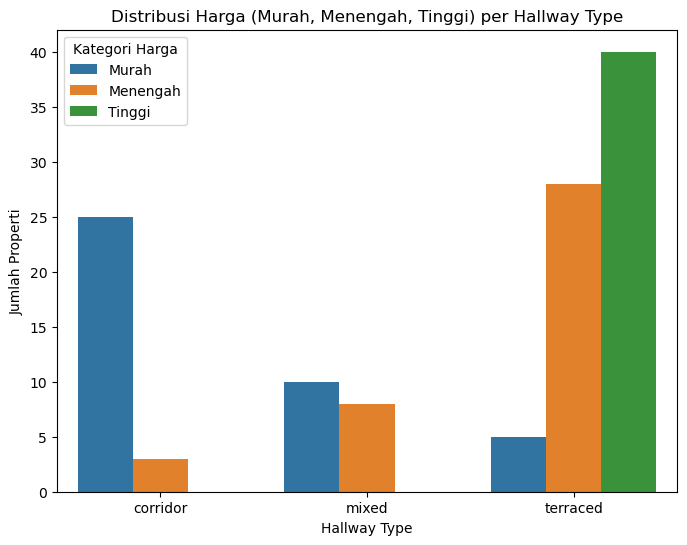

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_grouped, x="HallwayType", hue="PriceCategory")
plt.title("Distribusi Harga (Murah, Menengah, Tinggi) per Hallway Type")
plt.xlabel("Hallway Type")
plt.ylabel("Jumlah Properti")
plt.legend(title="Kategori Harga")
plt.show()

Analisis distribusi harga per kategori hallway menunjukkan bahwa unit dengan tipe corridor cenderung berada di segmen murah, tipe mixed lebih dominan di menengah, dan tipe terraced hampir selalu masuk kategori harga tinggi. Berdasarkan pola ini, fitur HallwayType kemudian diubah dari one-hot encoding menjadi ordinal encoding (corridor=0, mixed=1, terraced=2). Transformasi ini dimaksudkan agar model lebih mudah menangkap hubungan linier antara tipe hallway dan level harga.

In [86]:
from sklearn.preprocessing import OrdinalEncoder


In [88]:
hallway_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['corridor','mixed','terraced']]))
])

ct2 = ColumnTransformer(transformers=[
    ('ord_hallway', hallway_ord, ['HallwayType']),
    ('num', num_pipe, num_cols)     
])

In [91]:
xgb_pipe2 = Pipeline([
    ('preprocess', ct2),
    ('model', xgb_reg)
])

param_xgb = {
    "model__n_estimators": [300, 500, 1000],
    "model__max_depth": [3, 5, 7, 10],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0]
}

xgb_search2 = RandomizedSearchCV(
    estimator=xgb_pipe2,
    param_distributions=param_xgb,
    n_iter=20, cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42, n_jobs=-1
)

xgb_search2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('ord_hallway',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ord',
                                                                                                OrdinalEncoder(categories=[['corridor',
                                                                                                                            'mixed',
                                                                                                                            'terraced']]))]),
                                                                               ['HallwayType']),
                                                                              ('num',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                Robust...
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__n_estimators': [300, 500, 1000],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [92]:
y_pred_xgb2 = xgb_search2.predict(X_test)
rmse_xgb2 = np.sqrt(mean_squared_error(y_test, y_pred_xgb2))
mape_xgb2 = mean_absolute_percentage_error(y_test, y_pred_xgb2) * 100

print("XGB Test RMSE:", rmse_xgb2)
print("XGB Test MAPE (%):", mape_xgb2)

XGB Test RMSE: 24667.480191770435
XGB Test MAPE (%): 9.355345550207861


Hasil akhir dari eksperimen menunjukkan bahwa model XGBoost dengan pipeline preprocessing dan feature engineering yang tepat mampu mencapai MAPE sekitar 9%, yang tergolong highly accurate dalam konteks prediksi harga properti. Nilai ini berarti rata-rata kesalahan prediksi hanya sekitar 9% dari harga sebenarnya

In [93]:
final_model2 = xgb_search2.best_estimator_
with open("final_xgb_model.pkl", "wb") as f:
    pickle.dump(final_model2, f)

print("Final model saved as final_xgb_model_regresi.pkl")

Final model saved as final_xgb_model_regresi.pkl


In [94]:
xgb_model = final_model2.named_steps["model"]

feature_names = final_model2.named_steps["preprocess"].get_feature_names_out()

importances = xgb_model.feature_importances_

fitur_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)


In [95]:
fitur_importance

,Feature,Importance
0,ord_hallway__HallwayType,0.506547
4,num__BuildingAge,0.160704
1,num__N_FacilitiesInApt,0.139602
5,num__LogSize,0.102798
3,num__TimeToSubway_Min,0.038940
6,num__AmenitiesIndex,0.033340
2,num__StationMedianPrice,0.018069


# Business Recommendation

**Insight**
1. HallwayType (0.51)
Faktor paling dominan. Tipe hallway terraced cenderung menaikkan harga, sementara corridor lebih sering muncul di kategori murah. Artinya desain dan kualitas akses unit sangat memengaruhi persepsi nilai properti.

2. BuildingAge (0.16)
Usia bangunan masih cukup penting. Semakin tua bangunan, nilainya cenderung turun, meski pengaruhnya tidak sebesar hallway.

3. N_FacilitiesInApt (0.14)
Banyaknya fasilitas di dalam apartemen (misalnya gym, kolam renang, ruang serbaguna) ikut meningkatkan harga. Ini sinyal bahwa value-added amenities bisa menjadi selling point.

4. LogSize (0.10)
Ukuran unit tetap relevan: semakin besar unit, harganya semakin tinggi. Namun pengaruhnya lebih kecil dibanding hallway dan umur bangunan.

5. TimeToSubway_Min (0.04)
Kedekatan dengan transportasi publik berperan, meskipun relatif minor dalam dataset ini. Bisa jadi karena semua unit sudah cukup dekat dengan subway sehingga variasinya kecil.

6. AmenitiesIndex (0.03)
Indeks fasilitas sekitar apartemen berpengaruh kecil. Artinya, lingkungan sekitar memang penting, tapi tidak sebesar fitur internal properti.

7. StationMedianPrice (0.02)
Harga median di sekitar stasiun ternyata minim pengaruh. Bisa jadi karena harga lokal sudah tercermin di variabel lain, atau variasi antar-stasiun kecil.

**Rekomendasi**
1. Prioritaskan desain hallway premium. Unit dengan hallway bertipe terraced jelas dihargai jauh lebih tinggi, sehingga developer bisa fokus menawarkan desain ini pada proyek baru.

2. Investasi pada peremajaan bangunan. Karena umur bangunan menurunkan harga, strategi renovasi atau upgrade fasilitas dapat memperpanjang daya jual properti lama.

3. Tingkatkan fasilitas dalam apartemen. Menambahkan fasilitas internal (gym, ruang komunitas, taman indoor) terbukti mendorong nilai jual, sehingga bisa jadi prioritas investasi.